In [3]:
from sklearn import datasets

In [18]:
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# special matplotlib argument for improved plots
from matplotlib import rcParams

In [19]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [20]:
boston=load_boston()


In [21]:
bos = pd.DataFrame(boston.data)

In [22]:
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [23]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [24]:
bos.columns = boston.feature_names
print(bos.head())
bos


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [25]:
bos.columns = boston.feature_names

In [26]:
bos['price']=boston.target

In [27]:
bos

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [28]:
X = bos.drop('price', axis = 1)

In [29]:
y=bos.price

In [30]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64

In [31]:
X_train, X_test,Y_train, Y_test = train_test_split(X, y, test_size = 0.33, random_state = 5)

In [32]:
X_train.shape,Y_train.shape,X_test.shape

((339, 13), (339,), (167, 13))

In [33]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

In [34]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [35]:
lm.score(X, y)

0.7333350744540277

In [36]:
lm.coef_

array([-1.56381297e-01,  3.85490972e-02, -2.50629921e-02,  7.86439684e-01,
       -1.29469121e+01,  4.00268857e+00, -1.16023395e-02, -1.36828811e+00,
        3.41756915e-01, -1.35148823e-02, -9.88866034e-01,  1.20588215e-02,
       -4.72644280e-01])

In [37]:
Y_pred = lm.predict(X_test)


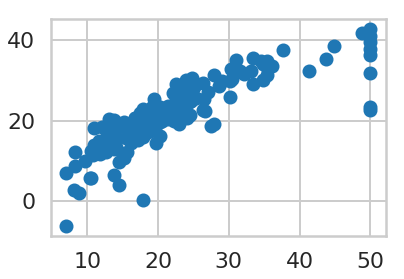

In [38]:
plt.scatter(Y_test, Y_pred)


In [39]:
mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print(mse)

28.530458765974583


In [43]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xgb_model = xgb.XGBRegressor()

eval_set = [(X_test, Y_test)]
xgb_model.fit(X_train, Y_train, eval_set=eval_set, verbose=False)

pred = xgb_model.predict(X_train)
print('xgb train mse: {}'.format(mean_squared_error(Y_train, pred)))
pred = xgb_model.predict(X_test)
print('xgb test mse: {}'.format(mean_squared_error(Y_test, pred)))

xgb train mse: 1.855266219234956
xgb test mse: 8.777392927452158


In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators= 375)
model3 = forest.fit(X_train, Y_train)
print(model3)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=375, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


In [54]:
#for R2, 1 is perfect prediction
r2_trains = model3.score(X_train, Y_train)
r2_tests = model3.score(X_test, Y_test)
print('r2 train:', r2_trains)
print('r2 test:', r2_tests)

r2 train: 0.9770467450883003
r2 test: 0.8866721464289891


In [62]:
# get predictions
Y_predicted_train = model3.predict(X_train)
Y_predicted_test = model3.predict(X_test)

In [64]:
#get MSE
MSE_train = mean_squared_error(Y_train, Y_predicted_train)
MSE_test = mean_squared_error(Y_test, Y_predicted_test)

In [85]:
print(MSE_train)
print(MSE_test)

1.832269077941652
10.623790148556239


In [65]:
# get RMSE by squared root
print('Train RMSE:', np.sqrt(MSE_train))
print('Test RMSE:', np.sqrt(MSE_test))

Train RMSE: 1.3536133413725102
Test RMSE: 3.259415614578208


In [82]:
# get MAE
MAE_train = mean_absolute_error(Y_train, Y_predicted_train)
MAE_test = mean_absolute_error(Y_test, Y_predicted_test)


In [83]:
print(MAE_train)
print(MAE_test)

0.8474768928220265
2.274585229540918


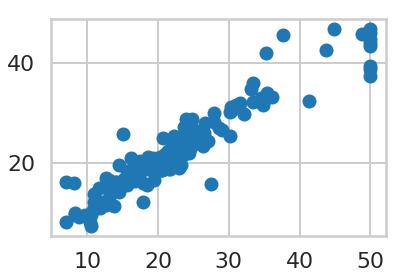

In [92]:
plt.scatter(Y_test, Y_predicted_test)


# Hyperparameter